In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

width = 505.89

inputnum_arr = np.array([1,2,3,4])
blknum_arr = np.array([10,20,50,100,200,500,1000])
datasz_arr = np.array([8192,65536,524288,4194304])
datasz_labels = np.array(["8KB", "64KB", "512KB", "4MB"])

In [71]:
def set_size(width, fraction=1):
    """ Set aesthetic figure dimensions to avoid scaling in latex.
    Parameters
    ----------
    width: float
            Width in pts
    fraction: float
            Fraction of the width which you wish the figure to occupy
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [72]:
def plot_kv(input_path, output_path):
    # VERIFY_KV (1 plot, bar graph, # of inputs on x-axis)
    w = 0.1
    colors = ['darksalmon','burlywood','darkseagreen','cornflowerblue','thistle','rosybrown','silver']

    fig, ax = plt.subplots(1,1,figsize=set_size(width, fraction=1))

    input_data = pd.read_csv(input_path)
    x = np.arange(len(inputnum_arr))
    y_values = list()

    # Get latency values by block_num. lists in "values" is what we want to plot
    for blk_num in blknum_arr:
        y_values.append(input_data.loc[input_data['block_num'] == blk_num]['total'].tolist())

    for i in range(len(y_values)):
        ax.bar(x+(-0.3+i*w), y_values[i], w, color=colors[i])

    ax.legend(blknum_arr.astype(str), fontsize=10, title="Number of blocks", ncol=2, bbox_to_anchor=(1,0.75))
    ax.set_xticks(x) 
    ax.set_xticklabels(inputnum_arr, fontsize=12)  
    yts = ax.get_yticks()
    yts = yts.astype(np.double)
    ax.set_yticklabels(yts, fontsize=12)

    plt.xlabel("Number of dependencies", fontsize=12)
    plt.ylabel("Latency (s)", fontsize=12)

    plt.ylim(0,3.5)
    plt.grid(linestyle='--', color='silver', axis='y', linewidth=0.5)
    plt.savefig(output_path, bbox_inches='tight', format='pdf')

In [73]:
def plot_kv_subplot(input_path, output_path, isLog):
    fig, axs = plt.subplots(2,2,figsize=set_size(width, fraction=1))
    colors = ['darksalmon','darkseagreen', 'cornflowerblue', 'plum']

    input_data = pd.read_csv(input_path)
    y_values = list()

    for input_num in inputnum_arr:
        y_values.append(input_data.loc[input_data['input_num'] == input_num]['total'].tolist())

    if isLog:
        x = blknum_arr
        bar_w = 0.2 * np.array(x)
    else:
        x = np.arange(len(blknum_arr))
        bar_w = 0.3
        
    axs[0,0].bar(x,y_values[0],bar_w,color=colors[0])
    axs[0,0].set_title("Number of dependencies = 1", fontsize=10)
    axs[0,1].bar(x,y_values[1],bar_w,color=colors[1])
    axs[0,1].set_title("Number of dependencies = 2", fontsize=10)
    axs[1,0].bar(x,y_values[2],bar_w,color=colors[2])
    axs[1,0].set_title("Number of dependencies = 3", fontsize=10)
    axs[1,1].bar(x,y_values[3],bar_w,color=colors[3])
    axs[1,1].set_title("Number of dependencies = 4", fontsize=10)

    for ax in axs.flat:
        if isLog:
            ax.set_xscale('log')
        ax.set_xticks(x, blknum_arr, fontsize=10)
        ax.set_xlabel("Number of blocks", fontsize=10)
        ax.set_ylabel('Latency (s)', fontsize=10)
        ax.label_outer()
    
    yts = axs[0,1].get_yticks()
    yts = yts.astype(np.double)
    new_yts = np.arange(min(yts), max(yts)+0.5, 0.5)
    axs[0,0].set_yticks(new_yts, new_yts, fontsize=10)
    axs[1,0].set_yticks(new_yts, new_yts, fontsize=10)
    axs[0,0].sharey(axs[0,1])
    axs[0,0].set_ylim(0,2.5)

    yts = axs[1,1].get_yticks()
    yts = yts.astype(np.double)
    new_yts = np.arange(min(yts), max(yts), 0.5)
    axs[1,1].set_yticks(new_yts, new_yts, fontsize=10)
    axs[1,0].set_yticks(new_yts, new_yts, fontsize=10)
    axs[1,0].sharey(axs[1,1])
    axs[1,0].set_ylim(0,3.5)

    for ax in axs.flat:
        ax.grid(linestyle='--', color='darkgrey', axis='y', linewidth=0.4)

    plt.savefig(output_path, bbox_inches='tight', format='pdf')

In [74]:
# def plot_kv_subplot_log(input_path, output_path):
#     # VERIFY_KV (1 plot w/ 4 subplots: 1 for each input_num, bar graph, blk_num on x-axis, log-scale x-axis)
#     w = 0.2
#     fig, axs = plt.subplots(2,2,figsize=set_size(width, fraction=1))
#     colors = ['darksalmon','darkseagreen', 'cornflowerblue', 'plum']

#     input_data = pd.read_csv(input_path)
#     y_values = list()

#     for input_num in inputnum_arr:
#         y_values.append(input_data.loc[input_data['input_num'] == input_num]['total'].tolist())

#     x = blknum_arr
#     axs[0,0].bar(x,y_values[0],width=w*np.array(x),color=colors[0])
#     axs[0,1].bar(x,y_values[1],width=w*np.array(x),color=colors[1])
#     axs[1,0].bar(x,y_values[2],width=w*np.array(x),color=colors[2])
#     axs[1,1].bar(x,y_values[3],width=w*np.array(x),color=colors[3])

#     axs[0,0].set_title("Number of dependencies = 1", fontsize=10)
#     axs[0,1].set_title("Number of dependencies = 2", fontsize=10)
#     axs[1,0].set_title("Number of dependencies = 3", fontsize=10)
#     axs[1,1].set_title("Number of dependencies = 4", fontsize=10)

#     for ax in axs.flat:
#         ax.set_xscale('log')
#         ax.set_xticks(x, blknum_arr, fontsize=10)
#         ax.set_xlabel("Number of blocks", fontsize=10)
#         ax.set_ylabel('Latency (s)', fontsize=10)
#         ax.label_outer()

#     yts = axs[0,1].get_yticks()
#     yts = yts.astype(np.double)
#     new_yts = np.arange(min(yts), max(yts)+0.5, 0.5)
#     axs[0,0].set_yticks(new_yts, new_yts, fontsize=10)
#     axs[1,0].set_yticks(new_yts, new_yts, fontsize=10)
#     axs[0,0].sharey(axs[0,1])
#     axs[0,0].set_ylim(0,2.5)

#     yts = axs[1,1].get_yticks()
#     yts = yts.astype(np.double)
#     new_yts = np.arange(min(yts), max(yts), 0.5)
#     axs[1,1].set_yticks(new_yts, new_yts, fontsize=10)
#     axs[1,0].set_yticks(new_yts, new_yts, fontsize=10)
#     axs[1,0].sharey(axs[1,1])
#     axs[1,0].set_ylim(0,3.5)

#     for ax in axs.flat:
#         ax.grid(linestyle='--', color='darkgrey', axis='y', linewidth=0.4)

#     plt.savefig(output_path, bbox_inches='tight', format='pdf')

In [75]:
# def plot_kv_subplot(input_path, output_path):    
#     # VERIFY_KV (1 plot w/ 4 subplots: 1 for each input_num, bar graph, blk_num on x-axis)
#     w = 0.3
#     fig, axs = plt.subplots(2,2,figsize=set_size(width, fraction=1))
#     colors = ['darksalmon','darkseagreen', 'cornflowerblue', 'plum']

#     input_data = pd.read_csv(input_path)
#     x = np.arange(len(blknum_arr))
#     y_values = list()

#     for input_num in inputnum_arr:
#         y_values.append(input_data.loc[input_data['input_num'] == input_num]['total'].tolist())

#     axs[0,0].bar(x,y_values[0],w,color=colors[0])
#     axs[0,0].set_title("Number of dependencies = 1", fontsize=10)
#     axs[0,1].bar(x,y_values[1],w,color=colors[1])
#     axs[0,1].set_title("Number of dependencies = 2", fontsize=10)
#     axs[1,0].bar(x,y_values[2],w,color=colors[2])
#     axs[1,0].set_title("Number of dependencies = 3", fontsize=10)
#     axs[1,1].bar(x,y_values[3],w,color=colors[3])
#     axs[1,1].set_title("Number of dependencies = 4", fontsize=10)

#     for ax in axs.flat:
#     #     ax.set(xlabel="Number of blocks", ylabel='Latency (s)')
#         ax.set_xticks(x, blknum_arr, fontsize=10)
#         ax.set_xlabel("Number of blocks", fontsize=10)
#         ax.set_ylabel('Latency (s)', fontsize=10)
#         ax.label_outer()

#     yts = axs[0,1].get_yticks()
#     yts = yts.astype(np.double)
#     new_yts = np.arange(min(yts), max(yts)+0.5, 0.5)
#     axs[0,0].set_yticks(new_yts, new_yts, fontsize=10)
#     axs[1,0].set_yticks(new_yts, new_yts, fontsize=10)
#     axs[0,0].sharey(axs[0,1])
#     axs[0,0].set_ylim(0,2.5)

#     yts = axs[1,1].get_yticks()
#     yts = yts.astype(np.double)
#     new_yts = np.arange(min(yts), max(yts), 0.5)
#     axs[1,1].set_yticks(new_yts, new_yts, fontsize=10)
#     axs[1,0].set_yticks(new_yts, new_yts, fontsize=10)
#     axs[1,0].sharey(axs[1,1])
#     axs[1,0].set_ylim(0,3.5)

#     for ax in axs.flat:
#         ax.grid(linestyle='--', color='darkgrey', axis='y', linewidth=0.4)

#     plt.savefig(output_path, bbox_inches='tight', format='pdf')

/var/folders/d2/qh_rvvqn0wxf1y6686nf0l98005hf2/T/ipykernel_96626/1761861540.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yts, fontsize=12)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (0,).

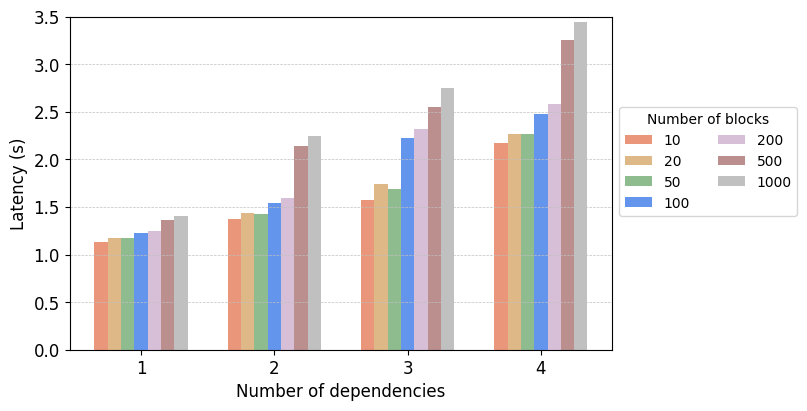

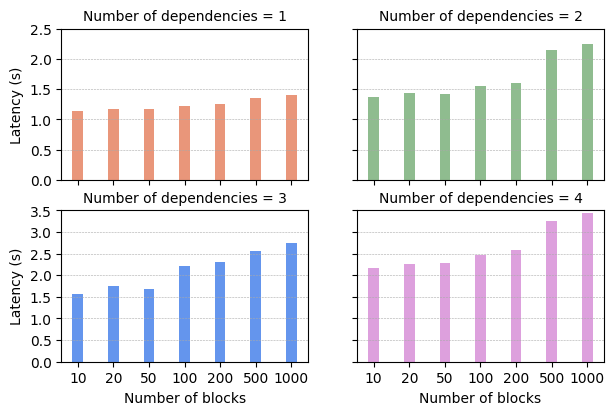

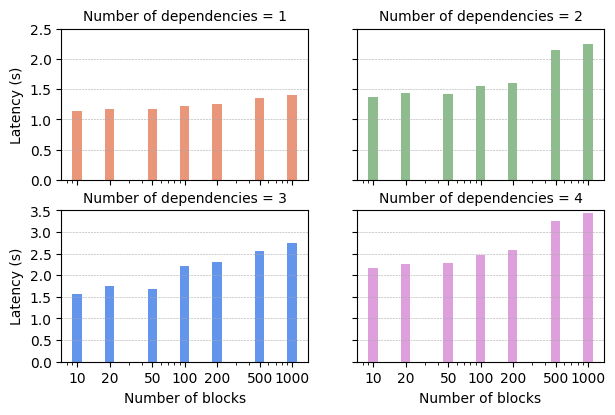

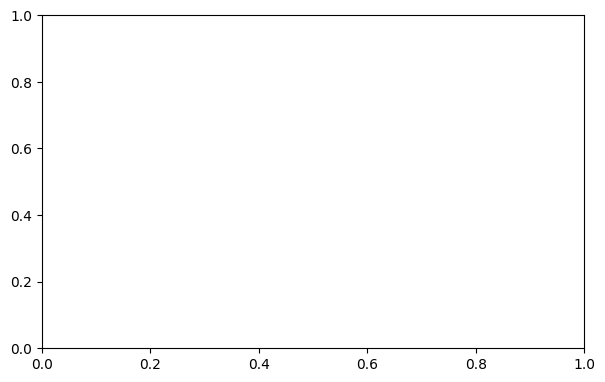

In [79]:
v_kv_path = "./data/v_kv.csv"

plot_kv(v_kv_path, "./kv.pdf")
plot_kv_subplot(v_kv_path, "./kv_sub.pdf", False)
plot_kv_subplot(v_kv_path, "./kv_sub_log.pdf", True)

v_kv_path = "./data/v_kv_local.csv"

plot_kv(v_kv_path, "./kv_local.pdf")
plot_kv_subplot(v_kv_path, "./kv_local_sub.pdf", False)
plot_kv_subplot(v_kv_path, "./kv_local_sub_log.pdf", True)


In [ ]:
def plot_opc(input_path, output_path):
    # VERIFY_OPC (1 plot, bar graph, # of inputs on x-axis)
    w = 0.1
    colors = ['darksalmon','burlywood','darkseagreen','cornflowerblue']

    fig, ax = plt.subplots(1,1,figsize=set_size(width, fraction=1))

    input_data = pd.read_csv(input_path)
    x = np.arange(len(datasz_arr))
    y_values = list()

    # Get latency values by block_num. lists in "values" is what we want to plot
    for ds in datasz_arr:
        y_values.append(input_data.loc[input_data['data_size'] == ds]['total'].tolist())

    print(y_values)

    for i in range(len(y_values)):
    #     ax.bar(x+(-0.2+i*w+0.05), y_values[i], w, color=colors[i])
        ax.plot(x, y_values[i], marker="o", color=colors[i])


    # ax.legend(datasz_arr.astype(str), fontsize=10, title="Data size", ncol=1, bbox_to_anchor=(1,0.75))
    ax.legend(datasz_labels.astype(str), fontsize=10, title="Data size", ncol=1, bbox_to_anchor=(1,0.75))
    ax.set_xticks(x)
    ax.set_xticklabels(inputnum_arr, fontsize=12)  
    yts = ax.get_yticks()
    yts = yts.astype(np.int64)
    ax.set_yticklabels(yts, fontsize=12)

    plt.xlabel("Number of dependencies", fontsize=12)
    plt.ylabel("Latency (s)", fontsize=12)
    plt.grid(linestyle='--', color='silver', axis='y', linewidth=0.4)
    plt.savefig(output_path, bbox_inches='tight', format='pdf')

[[0.492249, 0.524024, 0.556536, 0.576963], [0.551208, 1.35315, 1.107256, 1.421486], [2.211091, 5.271352, 6.440597, 9.413652], [19.017241, 26.143533, 43.422034, 68.348799]]


/var/folders/d2/qh_rvvqn0wxf1y6686nf0l98005hf2/T/ipykernel_96626/3762409952.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yts, fontsize=12)


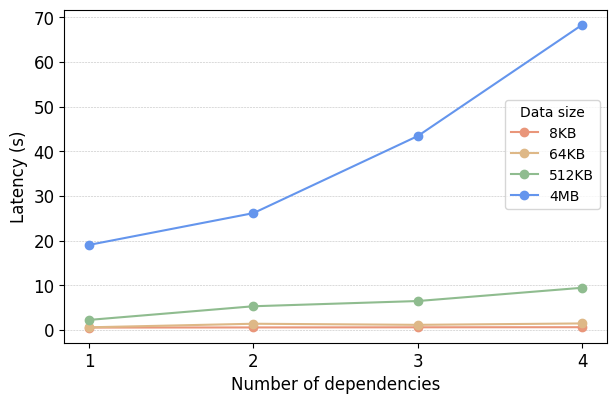

In [78]:
v_opc_path = "./data/v_opc.csv"
plot_opc(v_opc_path, "./opc.pdf")